# Data Science
## Assignment # 2
### Copenhagen's Cycling Data Analysis

##### 1) Installing the Dependencies

In [1]:
pip install pandas numpy matplotlib seaborn plotly scikit-learn prophet openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### 2) Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported!")

Libraries Imported!


##### 3) Loading the Datasets

In [3]:
sales_path = "Used_Data/cleaned_sales_10_years.csv"
accident_path = "Used_Data/accident_data_(1998-2023).csv"
socio_path = "Used_Data/preferences_data.csv"
logistic_path = "Used_Data/logistic_regression_analysis.csv"
commuter_path = "Used_Data/commuter_cycling_table.csv"

sales_df = pd.read_csv(sales_path)
accident_df = pd.read_csv(accident_path)
socio_df = pd.read_csv(socio_path)
logistic_df = pd.read_csv(logistic_path)
commuter_df = pd.read_csv(commuter_path)

print("Datasets Loaded!")

Datasets Loaded!


##### 4) Sales/Market Data Analysis

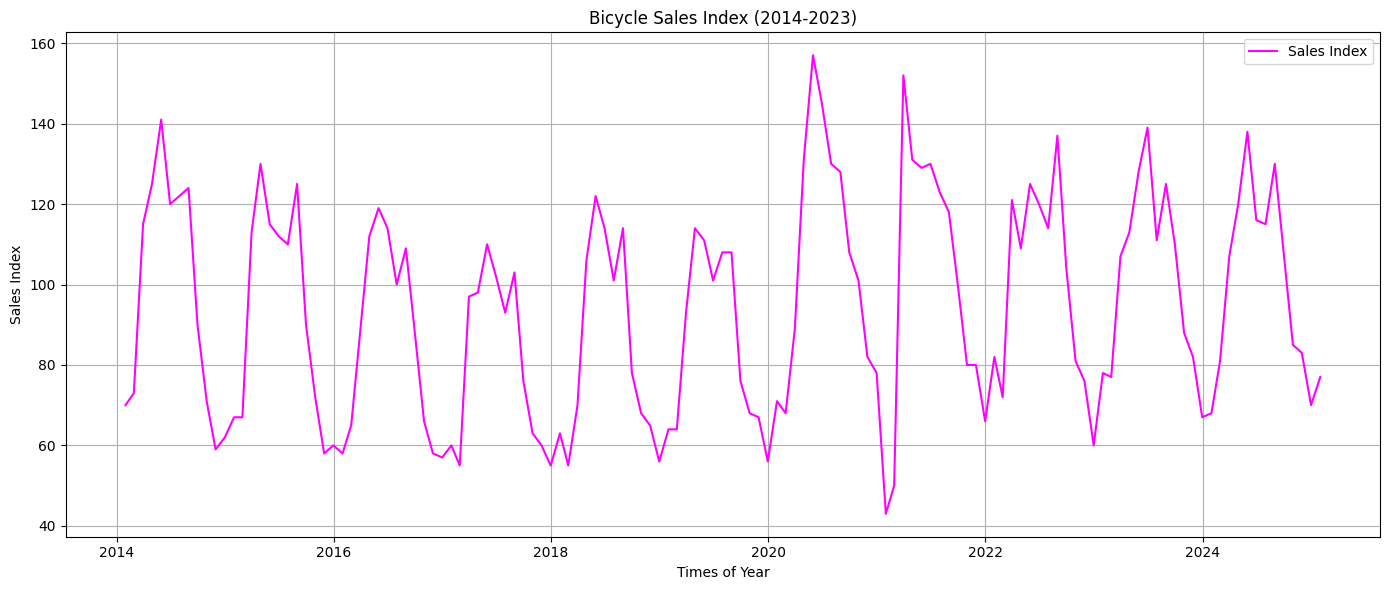

In [4]:
# Convert time index
sales_df["Date"] = pd.date_range(start="2014-01-01", periods=len(sales_df), freq="M")

# Line plot - Sales Trend
plt.figure(figsize=(14,6))
plt.plot(sales_df["Date"], sales_df["Bike_Sales"], label="Sales Index", color='magenta')
plt.title("Bicycle Sales Index (2014-2023)")
plt.xlabel("Times of Year")
plt.ylabel("Sales Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 5) Accident Data Analysis

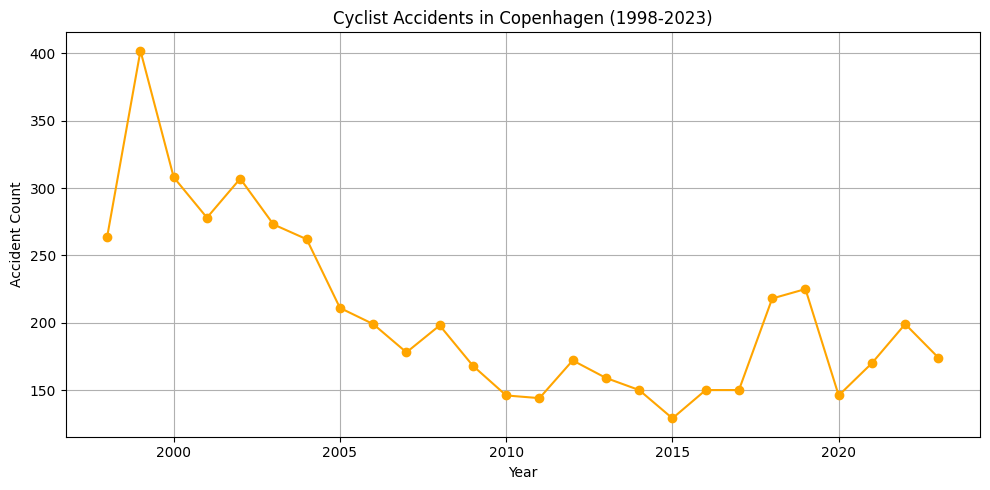

In [5]:
# Line plot - Accidents over time
plt.figure(figsize=(10,5))
plt.plot(accident_df["Year"], accident_df["Accident_Count"], marker='o', color='orange')
plt.title("Cyclist Accidents in Copenhagen (1998-2023)")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.grid(True)
plt.tight_layout()
plt.show()

##### 6) Accident Mode Pair Analysis

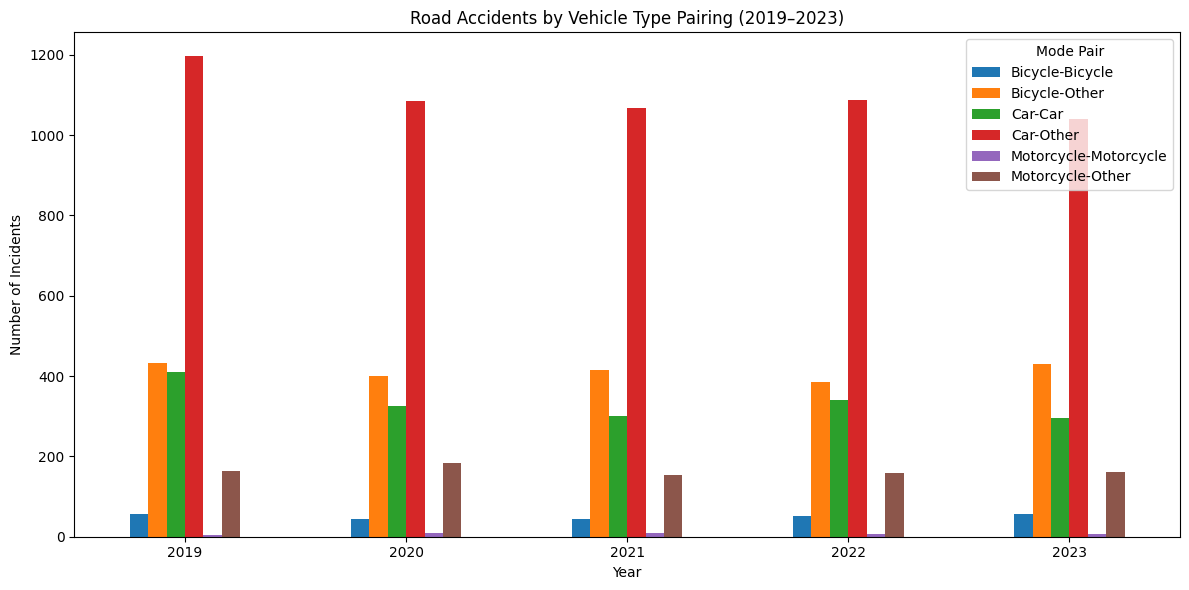

In [6]:
summary_df = pd.read_csv("Used_Data/accident_mode_pair_summary.csv", index_col=0)
summary_df.T.plot(kind='bar', figsize=(12,6))
plt.title("Road Accidents by Vehicle Type Pairing (2019–2023)")
plt.ylabel("Number of Incidents")
plt.xlabel("Year")
plt.xticks(rotation=0)
plt.legend(title="Mode Pair")
plt.tight_layout()
plt.show()

##### 7) Consumer Insights

##### Cycling Frequency by Age Groups

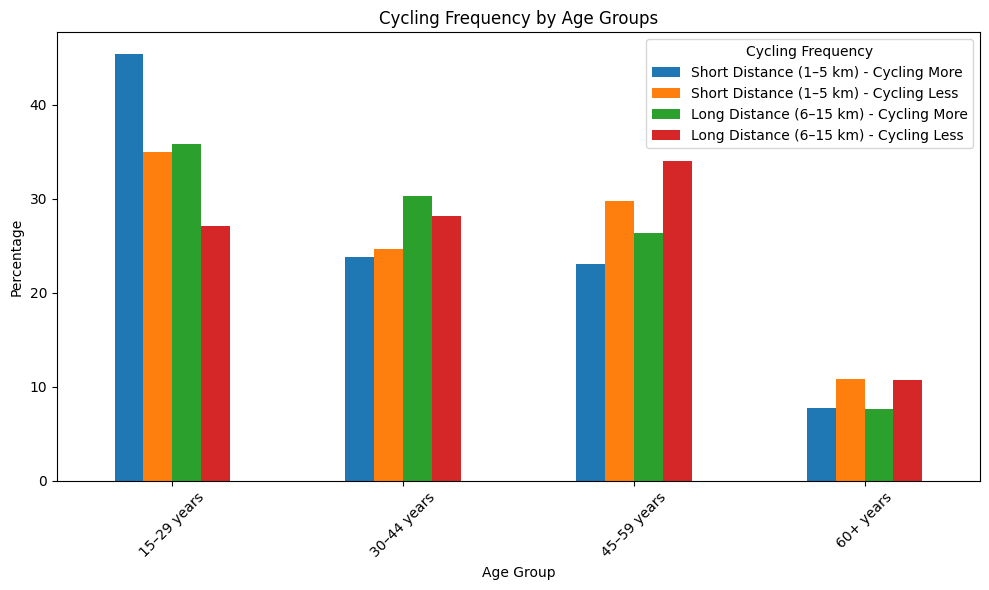

In [7]:
# Filter age group data only 
age_data = socio_df[(socio_df["Category"] == "Age groups") & (~socio_df["Subcategory"].str.contains("Total"))]

age_data.set_index("Subcategory")[[
    "Short Distance (1–5 km) - Cycling More",
    "Short Distance (1–5 km) - Cycling Less",
    "Long Distance (6–15 km) - Cycling More",
    "Long Distance (6–15 km) - Cycling Less"
]].plot(kind="bar", figsize=(10,6))

plt.title("Cycling Frequency by Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Percentage")
plt.xticks(rotation=45)
plt.legend(title="Cycling Frequency")
plt.tight_layout()
plt.show()

##### Students and Working People Using Bicycles

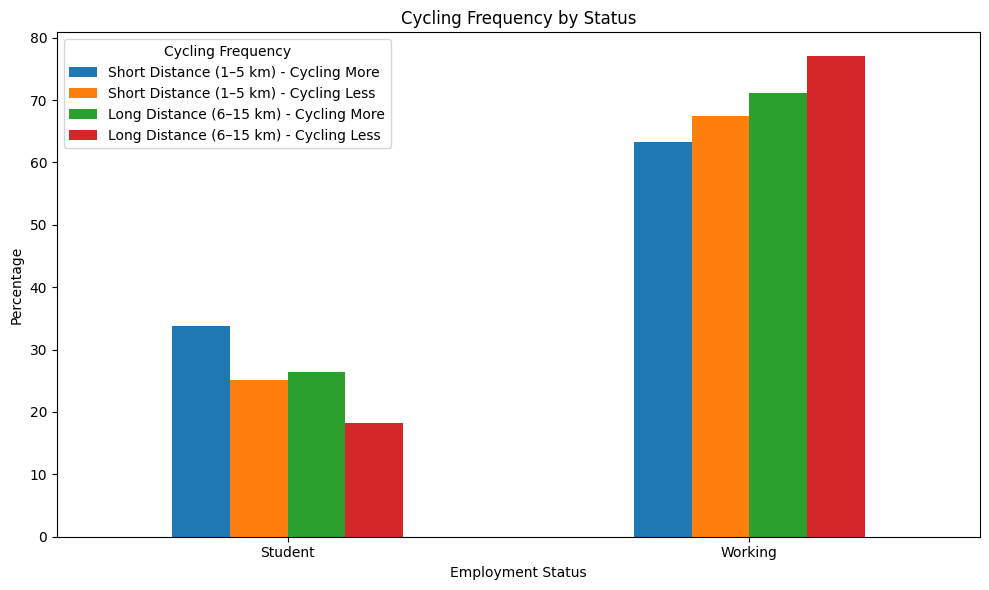

In [8]:
# By Categories like Students or Working People
employment_data = socio_df[
    (socio_df["Category"].str.lower().str.contains("employment")) & 
    (socio_df["Subcategory"].str.lower().isin(["student", "working"]))
]

employment_data.set_index("Subcategory")[[
    "Short Distance (1–5 km) - Cycling More",
    "Short Distance (1–5 km) - Cycling Less",
    "Long Distance (6–15 km) - Cycling More",
    "Long Distance (6–15 km) - Cycling Less"
]].plot(kind="bar", figsize=(10, 6))

plt.title("Cycling Frequency by Status")
plt.xlabel("Employment Status")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Cycling Frequency")
plt.tight_layout()
plt.show()

##### Weather Seems to be the Barrier

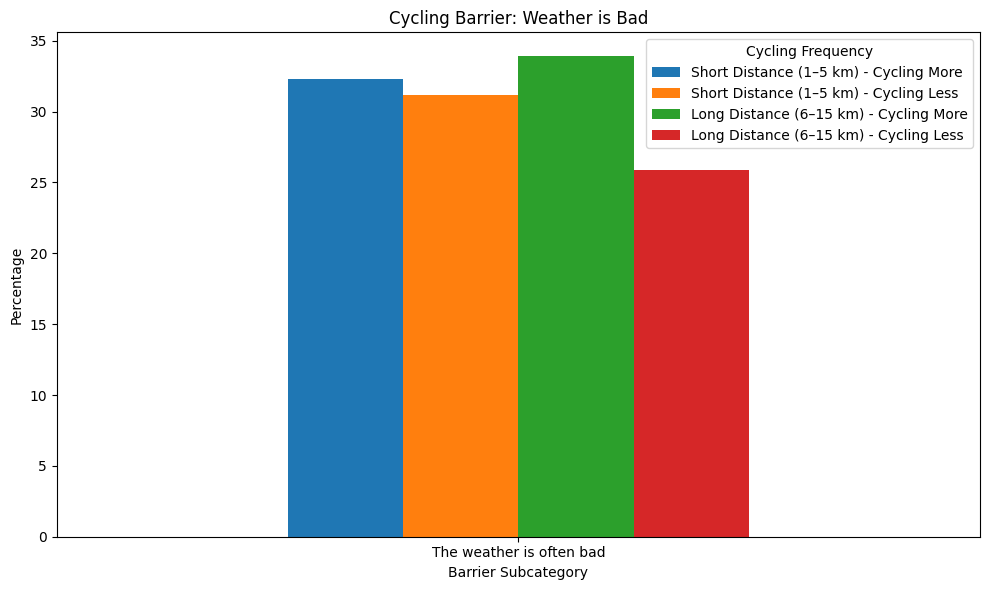

In [9]:
# Weather is the concern
weather_data = socio_df[
    (socio_df["Category"].str.lower().str.contains("barrier")) &
    (socio_df["Subcategory"].str.lower().str.contains("weather"))
]

if not weather_data.empty:
    weather_data.set_index("Subcategory")[[
        "Short Distance (1–5 km) - Cycling More",
        "Short Distance (1–5 km) - Cycling Less",
        "Long Distance (6–15 km) - Cycling More",
        "Long Distance (6–15 km) - Cycling Less"
    ]].plot(kind="bar", figsize=(10, 6))

    plt.title("Cycling Barrier: Weather is Bad")
    plt.xlabel("Barrier Subcategory")
    plt.ylabel("Percentage")
    plt.xticks(rotation=0)
    plt.legend(title="Cycling Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("No matching 'weather is bad' barrier found.")

##### When Road Safety is the Concern

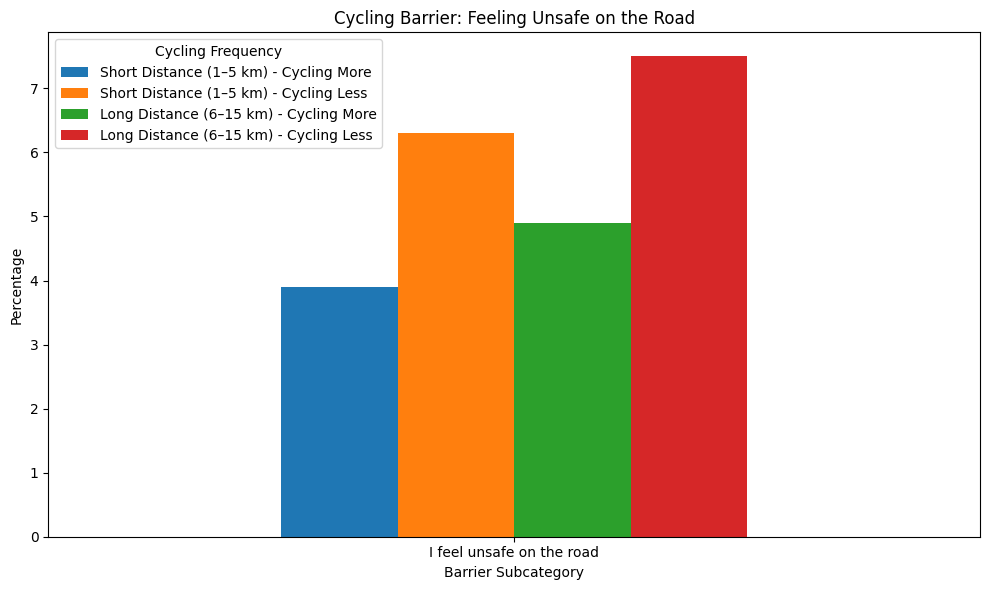

In [10]:
# When road safety is the concern
safety_data = socio_df[
    (socio_df["Category"].str.lower().str.contains("barrier")) &
    (socio_df["Subcategory"].str.lower().str.contains("unsafe"))
]

if not safety_data.empty:
    safety_data.set_index("Subcategory")[[
        "Short Distance (1–5 km) - Cycling More",
        "Short Distance (1–5 km) - Cycling Less",
        "Long Distance (6–15 km) - Cycling More",
        "Long Distance (6–15 km) - Cycling Less"
    ]].plot(kind="bar", figsize=(10, 6))

    plt.title("Cycling Barrier: Feeling Unsafe on the Road")
    plt.xlabel("Barrier Subcategory")
    plt.ylabel("Percentage")
    plt.xticks(rotation=0)
    plt.legend(title="Cycling Frequency")
    plt.tight_layout()
    plt.show()
else:
    print("No matching 'unsafe on the road' barrier found.")

##### Cycling Frequency by Commute Distance

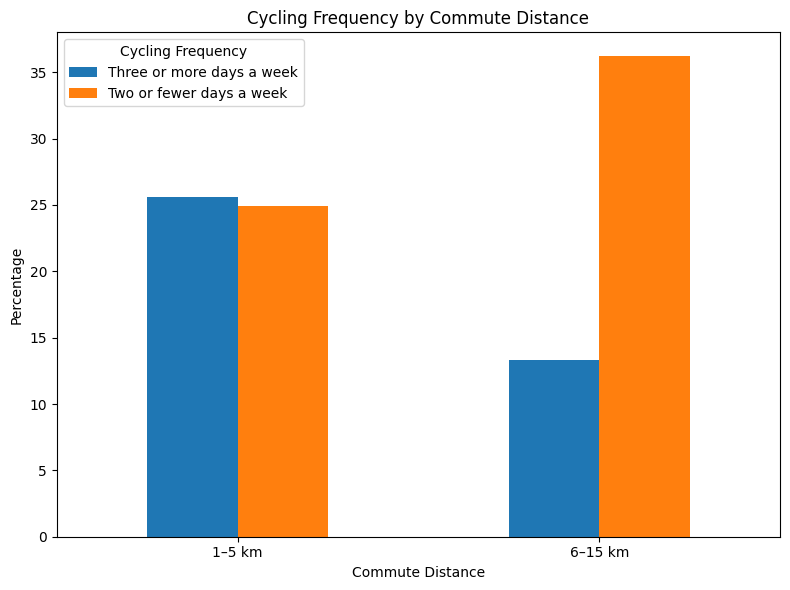

In [11]:
pivot_df = commuter_df.pivot(index="Distance", columns="Cycling Frequency", values="Percentage")

pivot_df.plot(kind="bar", figsize=(8, 6))
plt.title("Cycling Frequency by Commute Distance")
plt.xlabel("Commute Distance")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Cycling Frequency")
plt.tight_layout()
plt.show()

##### 8) Predictive Modelings

##### 8.1) Predicting Sales

##### Applying Models

02:58:47 - cmdstanpy - INFO - Chain [1] start processing
02:58:47 - cmdstanpy - INFO - Chain [1] done processing


Model Evaluation Results:

Linear Regression:
 MAE: 6.179769921436603
 RMSE: 7.234392108633045
 R2 Score: 0.8956456398404993 

Decision Tree:
 MAE: 22.791666666666668
 RMSE: 28.733691026389213
 R2 Score: -0.6462255823372416 

Random Forest:
 MAE: 8.705000000000004
 RMSE: 10.363469496264273
 R2 Score: 0.7858506018090619 

SVM:
 MAE: 21.09432363341376
 RMSE: 23.266420842709486
 R2 Score: -0.07935838591977351 

Prophet:
 MAE: 5.666586254571956
 RMSE: 6.673487905355671
 R2 Score: 0.9112001429179457 



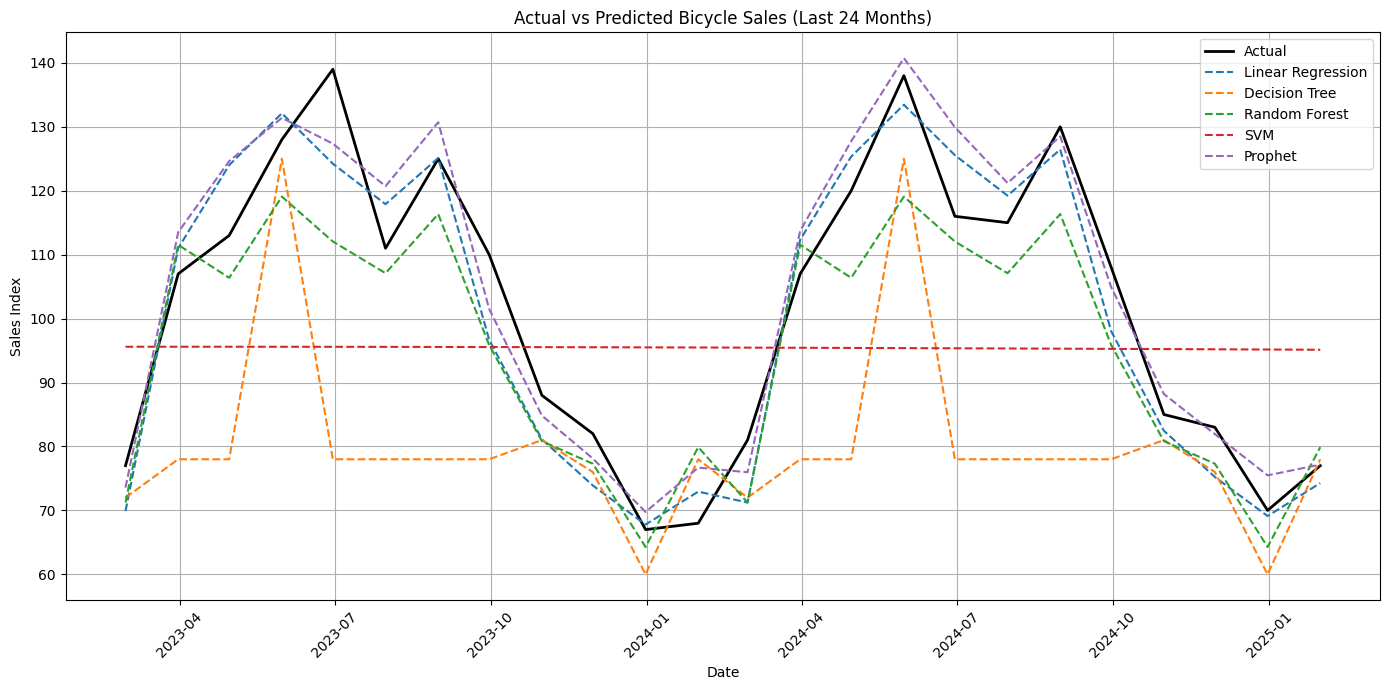

In [18]:
sales_df["Date"] = pd.date_range(start="2014-01-01", periods=len(sales_df), freq="M")

# Feature engineering
sales_df["Month"] = sales_df["Date"].dt.month
sales_df["TimeIndex"] = np.arange(len(sales_df))
sales_model_df = pd.get_dummies(sales_df, columns=["Month"], drop_first=True)

# Split
train = sales_model_df.iloc[:-24]
test = sales_model_df.iloc[-24:]
X_train = train.drop(columns=["Date", "Bike_Sales", "Category"])
y_train = train["Bike_Sales"]
X_test = test.drop(columns=["Date", "Bike_Sales", "Category"])
y_test = test["Bike_Sales"]
time_index = sales_df["Date"].iloc[-24:]

# Models
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
svm = SVR().fit(X_train, y_train)

# Predictions
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

# Prophet
prophet_df = sales_df[["Date", "Bike_Sales"]].rename(columns={"Date": "ds", "Bike_Sales": "y"})
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)
forecast_test = forecast.set_index("ds").loc[time_index]
prophet_pred = forecast_test["yhat"].values

# Evaluation
model_names = ["Linear Regression", "Decision Tree", "Random Forest", "SVM", "Prophet"]
predictions = [lr_pred, dt_pred, rf_pred, svm_pred, prophet_pred]

print("Model Evaluation Results:\n")
for name, pred in zip(model_names, predictions):
    print(f"{name}:")
    print(" MAE:", mean_absolute_error(y_test, pred))
    print(" RMSE:", mean_squared_error(y_test, pred, squared=False))
    print(" R2 Score:", r2_score(y_test, pred), "\n")

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(time_index, y_test.values, label="Actual", color='black', linewidth=2)

for name, pred in zip(model_names, predictions):
    plt.plot(time_index, pred, label=name, linestyle='--')

plt.title("Actual vs Predicted Bicycle Sales (Last 24 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Index")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 8.2) Predicting Sales on Specific Events

##### Applying Models

02:53:50 - cmdstanpy - INFO - Chain [1] start processing
02:53:50 - cmdstanpy - INFO - Chain [1] done processing


Model Evaluation Results:
                         MAE       RMSE        R2
Linear Regression   6.179770   7.234392  0.895646
Decision Tree      22.791667  28.733691 -0.646226
Random Forest       8.399167   9.984348  0.801232
SVM                21.107507  23.283994 -0.080989
Prophet             5.324076   6.598774  0.913177


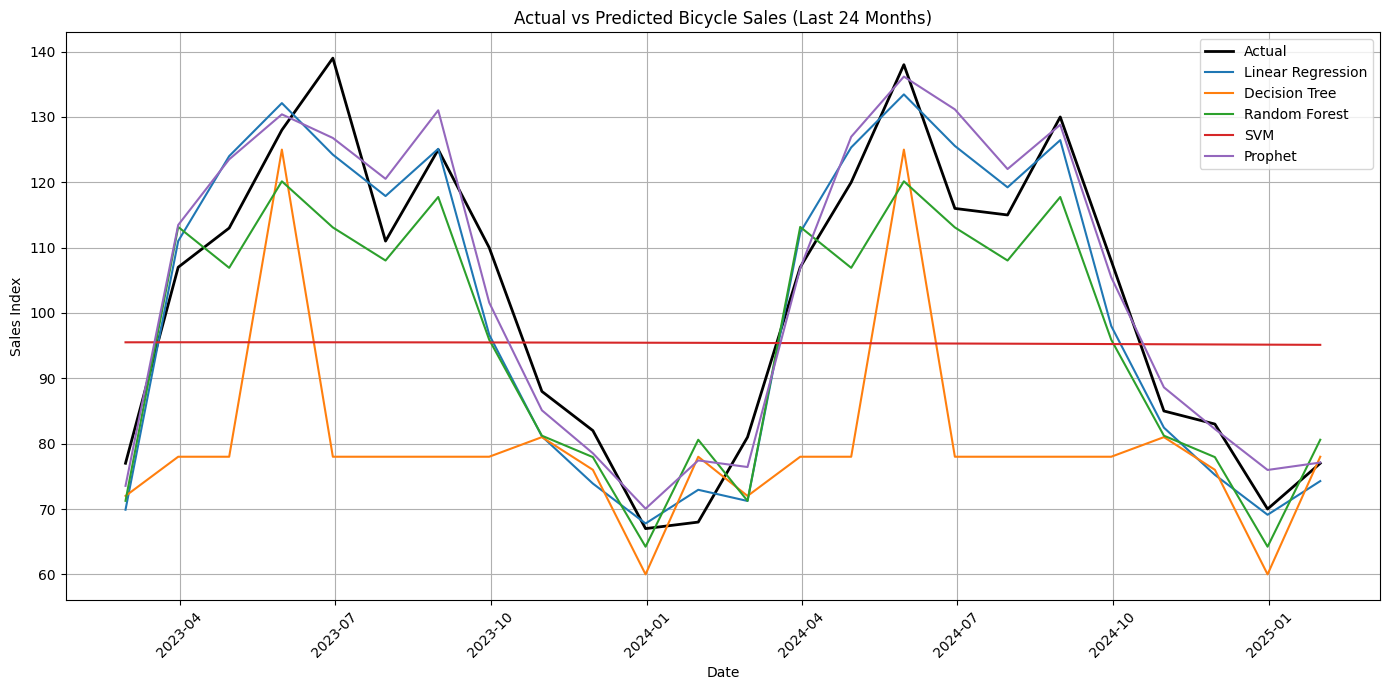

In [15]:
# Load enriched dataset
df = pd.read_csv("Used_Data/sales_with_events_denmark.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Feature Engineering
df["Month"] = df["Date"].dt.month
df["TimeIndex"] = np.arange(len(df))
df_encoded = pd.get_dummies(df, columns=["Month"], drop_first=True)

# Train/Test Split
train = df_encoded.iloc[:-24]
test = df_encoded.iloc[-24:]
X_train = train.drop(columns=["Date", "Bike_Sales", "Event"])
y_train = train["Bike_Sales"]
X_test = test.drop(columns=["Date", "Bike_Sales", "Event"])
y_test = test["Bike_Sales"]
time_test = test["Date"]

# Classical Models
lr = LinearRegression().fit(X_train, y_train)
dt = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
svm = SVR().fit(X_train, y_train)

lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test)

# Prophet Model
prophet_df = df[["Date", "Bike_Sales"]].rename(columns={"Date": "ds", "Bike_Sales": "y"})
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.add_country_holidays(country_name='DK')
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=12, freq='M')
forecast = prophet_model.predict(future)
forecast_test = forecast.set_index("ds").loc[time_test]
prophet_pred = forecast_test["yhat"].values

# Evaluate All Models
models = {
    "Linear Regression": lr_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred,
    "Prophet": prophet_pred
}

results = {
    name: {
        "MAE": mean_absolute_error(y_test, pred),
        "RMSE": mean_squared_error(y_test, pred, squared=False),
        "R2": r2_score(y_test, pred)
    } for name, pred in models.items()
}

results_df = pd.DataFrame(results).T
print("Model Evaluation Results:")
print(results_df)

# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(time_test, y_test.values, label="Actual", color="black", linewidth=2)

for name, pred in models.items():
    plt.plot(time_test, pred, label=name)

plt.title("Actual vs Predicted Bicycle Sales (Last 24 Months)")
plt.xlabel("Date")
plt.ylabel("Sales Index")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Results for Events

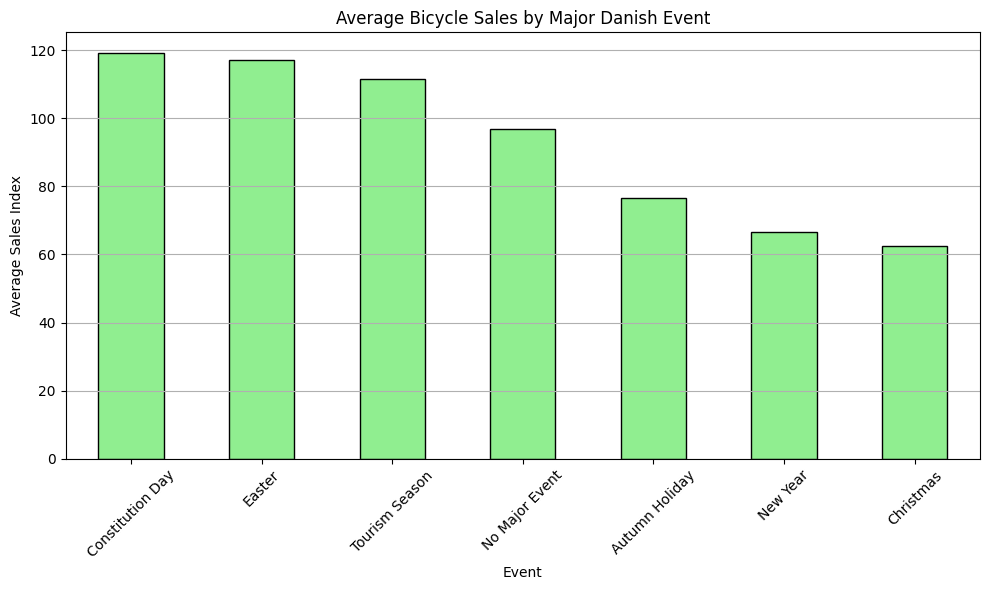

                   Avg_Sales    Std_Dev  Data_Points
Event                                               
Constitution Day  119.363636  13.851157           11
Easter            117.181818  11.088897           11
Tourism Season    111.545455  10.966892           11
No Major Event     96.878788  26.749272           66
Autumn Holiday     76.636364  11.508890           11
New Year           66.750000  10.454447           12
Christmas          62.454545   7.160498           11


In [16]:
df = pd.read_csv("Used_Data/sales_with_events_denmark.csv")
df["Date"] = pd.to_datetime(df["Date"])

# Group by Event and calculate mean sales
event_summary = df.groupby("Event")["Bike_Sales"].agg(["mean", "std", "count"]).sort_values(by="mean", ascending=False)
event_summary = event_summary.rename(columns={"mean": "Avg_Sales", "std": "Std_Dev", "count": "Data_Points"})

# Plot
plt.figure(figsize=(10, 6))
event_summary["Avg_Sales"].plot(kind="bar", color="lightgreen", edgecolor="black")
plt.title("Average Bicycle Sales by Major Danish Event")
plt.ylabel("Average Sales Index")
plt.xlabel("Event")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(event_summary)

##### Submitted by:
##### 21F-9116 Amash Rizwan
##### 21F-9137 Asjid Ali